# Least Squares Fitting

---

> Samuel Farrens 2016


## Contents

---
 
1. [Introduction](#Introduction)
1. [Set-Up](#Set-Up)
1. [Straight Line](#Straight-Line)
 * [Equation of a Straight Line](#Equation-of-a-Straight-Line)
 * [Least Sqaures Residual](#Least-Squares-Residual)
 * [Best Fit](#Best-Fit)
 * [Scipy](#Scipy)
1. [Kth Degree Polynomial](#Kth-Degree-Polynomial)
 * [Equation of a Polynomial Line](#Equation-of-a-Polynomial-Line)
 * [Matrix Notation](#Matrix-Notation)
 * [Straight Line Example](#Straight-Line-Example)
 * [Polynomial Line Example](#Polynomial-Line-Example)
1. [Regularisation](#Regularisation)
1. [Best Fit Derivation](#Best-Fit-Derivation)

## Introduction

---

Accoridng to [Wikipedia](https://en.wikipedia.org/wiki/Least_squares): *'The method of least squares is a standard approach in regression analysis to the approximate solution of overdetermined systems, i.e., sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the errors made in the results of every single equation.'*

It sounds complicated, but in practice it is very easy to follow and implement in Python. In the following sections we will build up the concept starting with most basic example and work out way up to a coprehensive understanding of the least squares method.

## Set-Up

---

Here we will import a couple of packages that we will need throughout the notebook.

In [86]:
# Tell Jupyter to display plots in this notebook.
%matplotlib inline

# Import the numpy package with the alias np.
import numpy as np               

# Import the pyplot package from matplotlib with the alias plt.
import matplotlib.pyplot as plt  

## Straight Line

---

The best place to start is with something that should be intimately familiar to anyone with even the most basic background in mathematics, a straight line.

### Equation of a Straight Line

A simple straight line can be represented with the following well known equation:

$$y = mx + c$$

where $m$ is the gradient or slope of the line and $c$ is the point where the line intercepts the $y$-axis. In Python we can implement the following function to represent this equation:

In [87]:
# Define the function y(x).
# This defines a function called y_func with input variables x, m and c, and returns the values of mx + c.
def y_func(x, m, c):
    
    return m * x + c

A straigh line passing through the origin would have a gradient of $m = 1$ and and an intercept of $c = 0$ (*i.e.* $y = x$). In Python we can represent this by chosing a range of values in the $x$-axis and plotting the line.

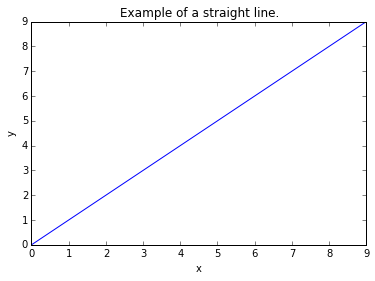

In [88]:
# Create an array of integers from 0 to 9.
x = np.arange(10)                

# Plot x vs y(x) for m=1 and c=0 with a blue line.
plt.plot(x, y_func(x, 1, 0), 'b-')

# Give a title to the plot and the axes.
plt.title('Example of a straight line.')
plt.xlabel('x')
plt.ylabel('y')

# Display the plot.
plt.show()                       

### Least Squares Residual

Now, let's take a collection of points where we alredy have both the $x$ and $y$ coordinates.

| x  | y  |
|:--:|:--:|
| 8  | 3  |
| 2  | 10 |
| 11 | 3  |
| 6  | 6  |
| 5  | 8  |
| 4  | 12 |
| 12 | 1  |
| 9  | 4  |
| 6  | 9  |
| 11 | 14 |

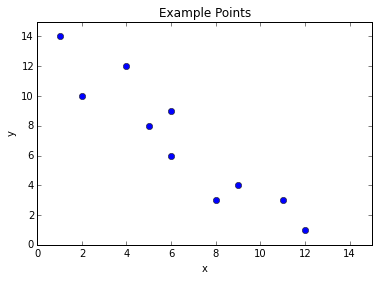

In [89]:
# Set predefined values for x and y.
x = np.array([ 8,  2, 11,  6,  5,  4, 12,  9,  6,  1])
y = np.array([3, 10, 3, 6, 8, 12, 1, 4, 9, 14])

# For simplicity we are going to sort these arrays by the elements in x.
index = np.argsort(x)
x = x[index]
y = y[index]

# Set the plot range from 0 to 15 in both axes so we can see all of the points clearly.
plt.xlim(0, 15)
plt.ylim(0, 15)

# Display the plot with blue dots.
plt.plot(x, y, 'bo') 
plt.title('Example Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We want to figure out what is the line or more preciscely what is the gradient and incercept of the line that best fits these points. The least squares method aims to find the soluiton in which the sum of the squared distances between our proposed line ($\hat{y}$) and the actual distribution of points ($y$) or residual ($R$) is minimum. 

One way to visualise this is to choose some arbitrary line (let's take $m=-0.5$ and $c=10.0$) and a measure the distance along the $y$-axis of each of the points to this line. 

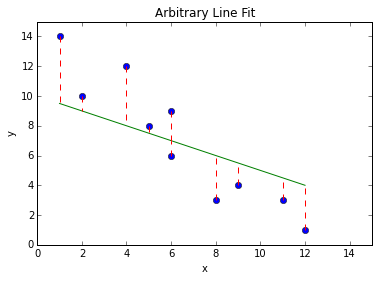

In [90]:
# Set the plot range from 0 to 15 in both axes so we can see all of the points clearly.
plt.xlim(0, 15)
plt.ylim(0, 15)

# Plot the data points.
plt.plot(x, y, 'bo') 

# Plot the arbitrary line in yellow.
plt.plot(x, y_func(x, -0.5, 10.0), 'g-', label='b')

# Plot the distance between the points and the arbitrary line.
for x_i, y_i in zip(x, y):
    plt.plot((x_i, x_i), (y_i, y_func(x_i, -0.5, 10.0)), 'r--')

# Display the plot.
plt.title('Arbitrary Line Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The residual for the above plot will be the sum of the square of the red dashed lines and the best fit line will have the smallest possible value of this sum.

The equation to measure the least squares residual is the following:

$$R = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (mx_i + c))^2$$

In Python we can represent this equation as follows:

In [91]:
# Define the least squares residual function.
def ls_res(y, y_hat):
    
    return np.sum((y - y_hat) ** 2)

# Print the residual for the arbitrary line.
print 'Arbitrary line residual =', ls_res(y, y_func(x, -0.5, 10.0))

Arbitrary line residual = 65.0


Our arbitrary line produced a residual of $65$. So, we want to see if we can find a line with a value lower than this.

Let's propose a few differnt lines and see how well they fit the data.

| Line | Gradient ($m$) | Intercept ($c$) | 
|:----:|:--------------:|:---------------:|
| a    | 1.0            | 0.0             | 
| b    | 0.0            | 7.0             |
| c    | -1.0           | 15.0            |

Using the least squares residual function we can check the residuals for each of these lines:

In [92]:
# Set the line gradient and intercept values.
a_line = (1.0, 0.0)
b_line = (0.0, 7.0)
c_line = (-1.0, 15.0)

# Check the residuals for each line.
print 'Residual for line a:', ls_res(y, y_func(x, *a_line))
print 'Residual for line b:', ls_res(y, y_func(x, *b_line))
print 'Residual for line c:', ls_res(y, y_func(x, *c_line))

Residual for line a: 550.0
Residual for line b: 166.0
Residual for line c: 48.0


The line that produced the lowest residual was **c** and out of the three should produce the best fit. We can plot each of lines and see if we agree.

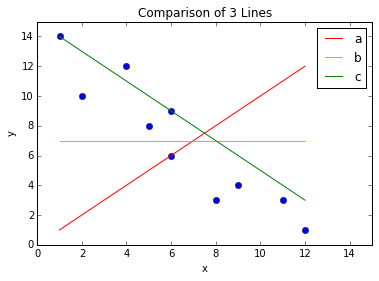

In [93]:
# Set the plot range from 0 to 15 in both axes.
plt.xlim(0, 15)
plt.ylim(0, 15)

# Plot the points.
plt.plot(x, y, 'bo') 

# Plot the 3 lines in red, yellow and green.
plt.plot(x, y_func(x, *a_line), 'r-', label='a')
plt.plot(x, y_func(x, *b_line), 'y-', label='b')
plt.plot(x, y_func(x, *c_line), 'g-', label='c')

# Add a plot legend.
plt.legend()

# Display the plot.
plt.title('Comparison of 3 Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The line c (green) does indeed fit the data better than a or b.

### Best Fit

In the previous example we found the best fit out of three possible lines. In reality, we have infinitely many lines to choose from and we want to find the one that gives the lowest possible residual.

One way to find the values of $m$ and $c$ that minimises the residual is with the following two equations:

$$m = \frac{\sum_{i=1}^{n}(x_i - \bar{X})(y_i - \bar{Y})}{\sum_{i=1}^{n}(x_i - \bar{X})^2}$$

$$c = \bar{Y} - m\bar{X}$$

where $\bar{X}$ and $\bar{Y}$ are the mean values of $x$ and $y$ respectively (the derivation of these equations is provided in a [later section](#Best-Fit-Derivation)). We can implement these equations in Python as follows:

In [94]:
# Calculate the gradient.
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)

# Calculate the intercept.
c = np.mean(y) - m * np.mean(x)

# Print the resulting values
print 'm =', m
print 'c =', c

m = -1.10641891892
c = 14.0810810811


Now we can check the residual and plot the line.

In [95]:
# Print the residual.
print 'Least squares residual = ', ls_res(y, y_func(x, m, c))

Least squares residual =  21.0591216216


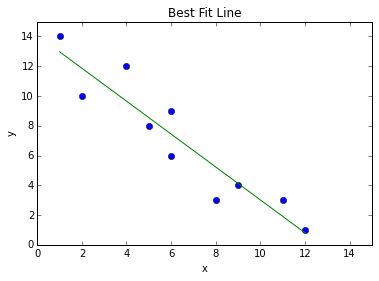

In [96]:
# Set the plot range from 0 to 15 in both axes.
plt.xlim(0, 15)
plt.ylim(0, 15)

# Plot the points.
plt.plot(x, y, 'bo') 

# Plot the best fit line in green.
plt.plot(x, y_func(x, m, c), 'g-')

# Display the plot.
plt.title('Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This solution has the smallest residual and the plot displays what appears to be the best fit.

### Scipy

Now that you know how to do it yourself you will be happy to know there is also a [built-in Scipy routine](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) for obtaining linear regression via least squares.

It can be easily implemented as follows:

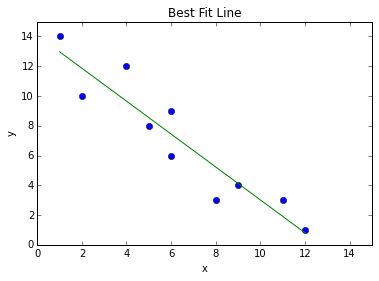

In [97]:
# Import the linregress function from Scipy Stats.
from scipy.stats import linregress

# Implement the function and keep the first two outputs (slope and intercept).
m, c = linregress(x, y)[:2]

# Set the plot range from 0 to 15 in both axes.
plt.xlim(0, 15)
plt.ylim(0, 15)

# Plot the points.
plt.plot(x, y, 'bo') 

# Plot the best fit line in green.
plt.plot(x, y_func(x, m, c), 'g-')

# Display the plot.
plt.title('Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Kth Degree Polynomial

---

It is not necessary that the best fit to a set of points be a straight line. In fact, often the best fit may be a polynomial with $k$ degrees of freedom. So, we need to generalise the expressions that we used in the previous section.

### Equation of a Polynomial Line

The expression for a straigh line (*i.e.* $k = 1$) generalises to the following form for a $k$th degree polynomial:

$$y = a_0 + a_1x + a_2x^2 + ... + a_kx^k$$

where $a_i$ are the polynomial coefficients. We can represent this in Python with the following function:

In [98]:
# Define the new function y(x) for any kth degree polynomial.
# This defines a function called y_func2 with input variables x and a, and returns the values of a0 + a1x + a2x^2 + ...
def y_func2(x, a):
    
    return sum([(a_i * x ** n) for a_i, n in zip(a, range(a.size))])

The expression for the least squares residual then generalises to:

$$R = \sum_{i=1}^{n}[y_i - (a_0 + a_1x_i + a_2x_i^2 + ... + a_kx_i^k)]^2$$

### Matrix Notation

These equations can be expressed more concisely in matrix notation as follows:

$$y = Xa$$

Where $a$ is a vector of the coeffcients $a_i$, $y$ is a vector of $y_i$ and $X$ is a matrix composed of $x_i^k$ that acts on $a$. This corresponds to the following minimisation problem:

$$\underset{x}{min} \ \|y - Xa\|_2^2 $$

which can be solved analytically as follows:

$$a = (X^TX)^{-1}X^Ty$$

and we can express this in Python as follows:

In [99]:
# Define function to calculate a from X and y.
# This function calculates the vector a from the input matrix X and vector y.
def a_func(X, y):
    
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

### Straight Line Example

We can use this function to solve our original linear regression problem from the previous section, but in order to do so we first need to convert the vector $x$ to a matrix $X$. To do this we note that the $a_0$ coefficient corresponds to out $y$-intercept value and therefore corresonds to $x^0 = 1$, hence we need to create a vector of ones with the same length as $x$ and stack the two to form the matrix $X$. This can be done in python as follows.

In [100]:
# Define the matrix X
X = np.vstack((np.ones(x.size), x)).T

# Find the values of the coefficients a.
a = a_func(X, y)
print 'a =', a

a = [ 14.08108108  -1.10641892]


Again we can check the residual and plot the corresponding line.

In [101]:
# Print the residual.
print 'Least squares residual =', ls_res(y, y_func2(x, a))

Least squares residual = 21.0591216216


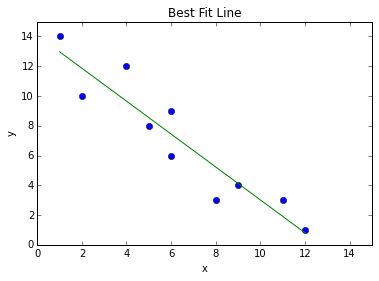

In [102]:
# Set the plot range from 0 to 15 in both axes.
plt.xlim(0, 15)
plt.ylim(0, 15)

# Plot the points.
plt.plot(x, y, 'bo') 

# Plot the line in green.
plt.plot(x, y_func2(x, a), 'g-')

# Display the plot.
plt.title('Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The results agree perfectly with those from the previous section!

### Polynomial Line Example

Now let's look at an example that requires a higer dimensional polynomial.

| x    | y     |
|:----:|:-----:|
| 0.00 | 0.486 | 
| 0.05 | 0.866 | 
| 0.10 | 0.944 | 
| 0.15 | 1.144 | 
| 0.20 | 1.103 | 
| 0.25 | 1.202 | 
| 0.30 | 1.166 |
| 0.35 | 1.191 | 
| 0.40 | 1.124 | 
| 0.45 | 1.095 | 
| 0.50 | 1.122 |
| 0.55 | 1.102 |
| 0.60 | 1.099 |
| 0.65 | 1.017 |
| 0.70 | 1.111 |
| 0.75 | 1.117 |
| 0.80 | 1.152 |
| 0.85 | 1.265 |
| 0.90 | 1.380 |
| 0.95 | 1.575 |
| 1.00 | 1.857 |

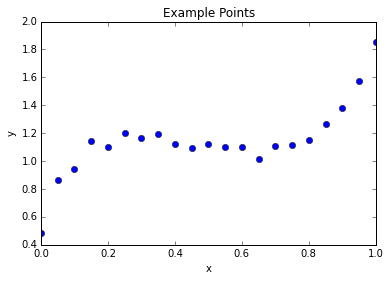

In [209]:
# Set predefined values for x and y.
x = np.linspace(0.0, 1.0, 21)
y = np.array([0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124, 1.095, 1.122, 1.102, 1.099, 1.017, 1.111, 
              1.117, 1.152, 1.265, 1.380, 1.575, 1.857])

# Display the plot.
plt.plot(x, y, 'o')
plt.title('Example Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

By eye we can see that a straight line would be a bad fit to this data, but let's make sure by testing a few different values of $k$. As with the previous example, we need define the matrix $X$ and we can use the following Python function to produce the X matrix for a polynomial of any degree (k):

In [276]:
# Function to define the matrix X.
# This function takes as input the vector x and the degree of the polynomial (k) and returns the matrix X.
def x_matrix(x, k):
    
    return np.vstack([x ** n for n in range(k + 1)]).T

Let's try first ($k=1$), second ($k=2$) and thrid ($k=3$) degree polynomials and check the corresponding residuals.

In [277]:
print 'Least squares residual (k = 1) =', ls_res(y, y_func2(x, a_func(x_matrix(x, 1), y)))
print 'Least squares residual (k = 2) =', ls_res(y, y_func2(x, a_func(x_matrix(x, 2), y)))
print 'Least squares residual (k = 3) =', ls_res(y, y_func2(x, a_func(x_matrix(x, 3), y)))

Least squares residual (k = 1) = 0.496578632974
Least squares residual (k = 2) = 0.487666893841
Least squares residual (k = 3) = 0.0599887009046


The third degree polynomial produces a much lower resdiaul. Let's plot the polynomial lines to see which one best fits the data.

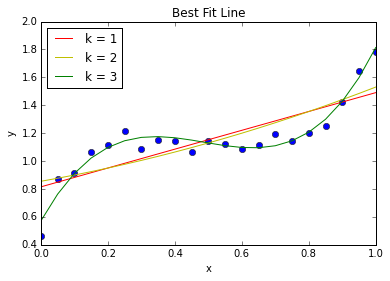

In [283]:
# Find the values of the coefficients a.

# k = 1
a1 = a_func(x_matrix(x, 1), y)

# k = 2
a2 = a_func(x_matrix(x, 2), y)

# k = 3
a3 = a_func(x_matrix(x, 3), y)

# Plot the points.
plt.plot(x, y, 'bo') 

# Plot the line in green.
plt.plot(x, y_func2(x, a1), 'r-', label='k = 1')
plt.plot(x, y_func2(x, a2), 'y-', label='k = 2')
plt.plot(x, y_func2(x, a3), 'g-', label='k = 3')

# Display the plot.
plt.legend(loc='upper left')
plt.title('Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The $k = 3$ line (green) is clearly the best fit.
 
## Regularisation

---

In the previous section we saw two examples where the data could be fit very nicely by a straight or polynomial line. It is, however, possible to *overfit* the data. In the following example we fit the data points with a fifth degree ($k=5$) polynomial.

Least squares residual = 0.0105628888016


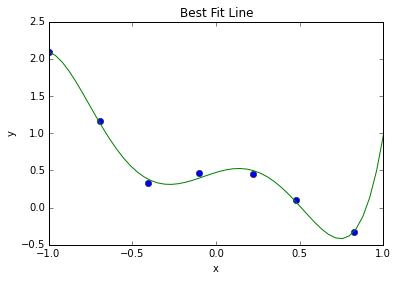

In [320]:
# Set predefined values for x and y.
x = np.array([-0.99768, -0.69574, -0.40373, -0.10236, 0.22024, 0.47742, 0.82229])
y = np.array([2.0885, 1.1646, 0.3287, 0.46013, 0.44808, 0.10013, -0.32952])

# Define a smooth set of points from -1.0 to 1.0. This is so we see the full shape of the polynomial line.
x_smooth = np.linspace(1.0, -1.0, 50)

# Define the matrix X for k = 5.
X = x_matrix(x, 5)

# Find the values of the coefficients a.
a = a_func(X, y)

# Print the residual.
print 'Least squares residual =', ls_res(y, y_func2(x, a))

# Plot the points.
plt.plot(x, y, 'bo') 

# Plot the line in green.
plt.plot(x_smooth, y_func2(x_smooth, a), 'g-')

# Display the plot.
plt.title('Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It may be that the above distribution is undersampled and that our line is overfitting the available data. To avoid overfitting we can add an additional constraint to our minimisation problem as follows:

$$\underset{x}{min} \ \|y - Xa\|_2^2 + \lambda \|a\|_2^2$$

where $\lambda$ is the regularisation coefficient. This problem can also be solved analytically as follows:

$$a = (X^TX + \lambda I_n)^{-1}X^Ty$$

where $I_n$ is the identity matrix. Now we can write a new function in Python to obtain the values of the coeffcients $a$ as follows:


In [323]:
# Define a new function to calculate a from X and y.
# This function calculates the vector a from the input matrix X, the vector y and the regularisation parameter lambda.
def a_func2(X, y, lamb):
    
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lamb * np.eye(X.shape[1])), X.T), y)

Using this new function we can test how different values of the regularisation parameter $\lambda$ affect the fit.

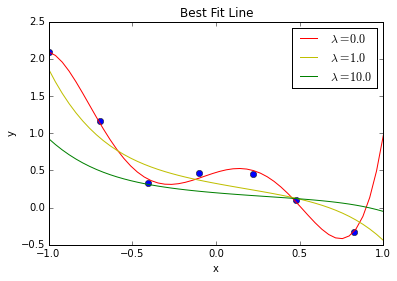

In [324]:
# Find the values of the coefficients a.

# lambda = 0.0
a1 = a_func2(X, y, 0.0)

# lambda = 1.0
a2 = a_func2(X, y, 1.0)

# lambda = 10.0
a3 = a_func2(X, y, 10.0)

# Plot the points.
plt.plot(x, y, 'bo') 

# Plot the lines.
plt.plot(x_smooth, y_func2(x_smooth, a1), 'r-', label=r'$\lambda=0.0$')
plt.plot(x_smooth, y_func2(x_smooth, a2), 'y-', label=r'$\lambda=1.0$')
plt.plot(x_smooth, y_func2(x_smooth, a3), 'g-', label=r'$\lambda=10.0$')

# Display the plot.
plt.legend()
plt.title('Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Best Fit Derivation

---

Now we can go back and derive the equations provided [earlier](#Best-Fit) to determine the best fit slope and intercept of a straight line. 

The condition for the least square residual ($R$) to be at a minimum is:

$$\frac{\partial R}{\partial a_i} = 0$$

So, for example, a straight line ($y = a_0 + a_1x$) will have the following residual:

$$R = \sum_{i=1}^{n}[y_i - (a_0 + a_1x_i)]^2$$

and hence the following partial derivatives:

$$\frac{\partial R}{\partial a_0} = -2\sum_{i=1}^{n}[y_i - (a_0 + a_1x_i)] = 0$$

$$\frac{\partial R}{\partial a_1} = -2\sum_{i=1}^{n}[y_i - (a_0 + a_1x_i)]x_i = 0$$

which lead to the following equations:

$$\sum_{i=1}^{n}y_i = na_0 + a_1\sum_{i=1}^{n}x_i$$

$$\sum_{i=1}^{n}x_iy_i = a_0\sum_{i=1}^{n}x_i + a_1\sum_{i=1}^{n}x_i^2$$

which can be expressed in matrix form as:

$$\Bigg[\begin{array}{c} \sum_{i=1}^{n}y_i \\ \sum_{i=1}^{n}x_iy_i \\ \end{array} \Bigg] = \Bigg[\begin{array}{cc} n & \sum_{i=1}^{n}x_i \\ \sum_{i=1}^{n}x_i & \sum_{i=1}^{n}x_i^2 \\ \end{array} \Bigg]$$

and thus solving this [analytically](#Matrix-Notation) we get the expected expressions:

$$a_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{X})(y_i - \bar{Y})}{\sum_{i=1}^{n}(x_i - \bar{X})^2}$$

$$a_0 = \bar{Y} - m\bar{X}$$